### **Part 1: Google Colab Setup**

Next we need to run a few commands to set up our environment on Google Colab. If you are running this notebook on a local machine you can skip this section.

1. Run the following cell to mount your Google Drive. Follow the link, sign in to your Google account (the same account you used to store this notebook!) and copy the authorization code into the text box that appears below.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. You can use command line instructions like `ls` and `cd` to find the folder that this notebook is stored. Move to this folder by changing the code below to access your folder:

In [ ]:
%ls "/content/drive/MyDrive/s3d21"

Assignment-1.ipynb
Assignment3.ipynb
Assignment5.ipynb
bundle_adjustment.ipynb
camera_position_optimization_with_differentiable_rendering.ipynb
pytorch3D_LabClass2.ipynb
SNCore.v2/
SNCore.v2.tgz
TexturesInPytorch3d.ipynb


3. If you're using python scripts together with your implementation we recommend using the [autoreload](https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html?highlight=autoreload) extension. This allows us to edit .py source files, and re-import them into the notebook for a seamless editing and debugging experience.

In [ ]:
%load_ext autoreload
%autoreload 2

### **Part 2: PyTorch Tensors**

As instructed in class we'll be using PyTorch in all throught the semester, for more information check the assignment instructions page and the references provided.

1. Start by importing and checking PyTorch version. In case you're running locally, you must be sure to have [installed](https://pytorch.org/get-started/locally/) the latest version in a proper environment.

In [ ]:
import torch
print(torch.__version__)
import numpy as np

1.8.1+cu101


In [ ]:
# Example
# 2x2 tensor built from a regular array
T = torch.tensor( [ [1,2], [3, 4] ] )     
print(T)

T_row = T[0,:]
T_cln = T[:,0]
T_e =   T[0,0].item()
print(T[0,0], T_e)
 
print(T.dtype)
print(T.size())

tensor([[1, 2],
        [3, 4]])
tensor(1) 1
torch.int64
torch.Size([2, 2])


In [ ]:
torch.set_default_dtype(torch.float)
torch.get_default_dtype()

torch.float32

2. Run the example above, or a similar one, but experiment using the functions: `torch.Tensor`, `torch.as_tensor` and `torch.empty` when creating tensors. You should also check `torch.set_default_dtype` and experiment with it. See [doc](https://pytorch.org/docs/stable/torch.html#)
3. You must check for differences in how PyTorch handles memory and data type.
4. Write on markdown or as a comment a brief comment on what is the difference between using those or the standard `torch.tensor`.

**Tanto o torch.Tensor como o torch.empty utilizam o tipo default (podendo ser verificado a partir da função torch.get_default_dtype()). No caso do torch.empty, pode ser definido o tipo por parâmetro. No caso do torch.tensor, o tipo acaba sendo inferido de acordo com o dado de entrada. Percebi que ambas as funções torch.tensor e torch.Tensor, acabam criando uma cópia dos dados. No entanto, torch.as_tensor guarda uma referência a um vetor numpy. Nesse caso, se um valor for modificado tanto a partir do tensor, quanto a partir do array, a modificação irá aparecer ao printar tanto o tensor quanto o numpy array.**

In [ ]:
T1 = torch.tensor([1, 2, 3]) # type is inferred
print("torch.tensor")
print("-", T1)
print("-", T1.dtype, T1.size())

# alias for the default tensor type torch.FloatTensor
# if use dtype=torch.int as an input parameter, it throws an error
T2 = torch.Tensor([1, 2, 3])
print("torch.Tensor")
print("-", T2)
print("-", T2.dtype, T2.size())

torch.tensor
- tensor([1, 2, 3])
- torch.int64 torch.Size([3])
torch.Tensor
- tensor([1., 2., 3.])
- torch.float32 torch.Size([3])


In [ ]:
import numpy as np
input_np = np.array([[10, 20, 30],[20,30,40],[40,50,70]])
print(input_np)

A1 = torch.as_tensor(input_np) # only here no copy is performed
A2 = torch.tensor(torch.as_tensor(input_np)) # copy
A3 = torch.tensor(input_np) # copy
#A4 = torch.Tensor(torch.as_tensor(input_np)) # only if numpy was created with dtype = np.float32
A5 = torch.Tensor(input_np) # copy

input_np[1,1] = 0
print(input_np)

A1[0,0] = 0 # this also affects the numpy array
print(A1, A1.dtype)
print(A2, A2.dtype)
print(A3, A3.dtype)
#print(A4, A4.dtype)
print(A5, A5.dtype)
print(input_np)


[[10 20 30]
 [20 30 40]
 [40 50 70]]
[[10 20 30]
 [20  0 40]
 [40 50 70]]
tensor([[ 0, 20, 30],
        [20,  0, 40],
        [40, 50, 70]]) torch.int64
tensor([[10, 20, 30],
        [20, 30, 40],
        [40, 50, 70]]) torch.int64
tensor([[10, 20, 30],
        [20, 30, 40],
        [40, 50, 70]]) torch.int64
tensor([[10., 20., 30.],
        [20., 30., 40.],
        [40., 50., 70.]]) torch.float32
[[ 0 20 30]
 [20  0 40]
 [40 50 70]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [ ]:
print(torch.empty(3,3))
print(torch.empty(3,3).dtype) # default type
print(torch.empty((3,3), dtype = torch.int32).dtype)

tensor([[1.7918e-13, 3.0757e-41, 3.3631e-44],
        [0.0000e+00,        nan, 0.0000e+00],
        [1.1578e+27, 1.1362e+30, 7.1547e+22]])
torch.float32
torch.int32


5. Write a function that receives a 2D tensor as input and returns a tensor of same size that is 
- equal to the input on the first row
- 2 times the input's second row on the second row
- 3 times the input's third row on the third row
- etc..

For instance:
```
>>> t = torch.full((4, 8), 2.0)
>>> t
tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
[2., 2., 2., 2., 2., 2., 2., 2.],
[2., 2., 2., 2., 2., 2., 2., 2.],
[2., 2., 2., 2., 2., 2., 2., 2.]])
>>> mul_row(t)
tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
[4., 4., 4., 4., 4., 4., 4., 4.],
[6., 6., 6., 6., 6., 6., 6., 6.],
[8., 8., 8., 8., 8., 8., 8., 8.]])
```

6. You must use tensor operations to do so, which means no loops.
  **Hint**: Use broadcasting and `torch.arange`, `torch.view`, and `torch.mul`.

7. *Extra*: You can also implement a simpler version using loops and simple indexing, and then compare the two functions using `times` for large tensors (ex: `torch.ones(1000,500)`).

**é necessário usar um torch.arange para criar um vetor, usar o torch.view para reordená-lo em uma coluna, e depois usar a função de multiplicação torch.mul. Foi possível perceber drasticamente a melhora de tempo ao comparar o uso do torch.mul com uma versão simples de um loop iterando em cada linha da matriz. Também fiz o teste usando o operador ‘*’ ao invés do torch.mul.**

In [ ]:
a = torch.randn(4, 1)
print(a)
b = torch.randn(1, 4)
print(b)
print(torch.mul(a, b))


tensor([[-0.4269],
        [ 1.1584],
        [-1.7844],
        [ 1.0002]])
tensor([[ 0.1224, -2.6020,  1.8590, -2.0892]])
tensor([[-0.0523,  1.1109, -0.7936,  0.8919],
        [ 0.1418, -3.0143,  2.1535, -2.4202],
        [-0.2185,  4.6431, -3.3172,  3.7280],
        [ 0.1224, -2.6025,  1.8593, -2.0895]])


In [ ]:
t = torch.full((4, 8), 2.0)

def multLinesTensor(ts):
  ta = torch.arange(1, ts.size()[0]+1).view(-1, 1)
  return torch.mul(ta, ts)

def multLinesTensor2(ts):
  ta = torch.arange(1, ts.size()[0]+1).view(-1, 1)
  return ta * ts  # one element to be multiplied for each line

print(t)
print(multLinesTensor(t))
print(multLinesTensor2(t))

tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2., 2., 2., 2.]])
tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
        [4., 4., 4., 4., 4., 4., 4., 4.],
        [6., 6., 6., 6., 6., 6., 6., 6.],
        [8., 8., 8., 8., 8., 8., 8., 8.]])
tensor([[2., 2., 2., 2., 2., 2., 2., 2.],
        [4., 4., 4., 4., 4., 4., 4., 4.],
        [6., 6., 6., 6., 6., 6., 6., 6.],
        [8., 8., 8., 8., 8., 8., 8., 8.]])


In [ ]:
ts0 = torch.ones(1000,600)
ts1 = torch.ones(1000,600)
ts2 = torch.ones(1000,600)

import time
def multLines(ts):
  for l in range(ts.shape[0]):
    for r in range(ts.shape[1]):
      ts[l,r] = ts[l,r] * (l+1) 
  return ts

t0 = time.time()
multLines(ts0)
print("seconds " + str(time.time() - t0))

t1 = time.time()
multLinesTensor(ts1)
print("seconds " + str(time.time() - t1))

t2 = time.time()
multLinesTensor2(ts2)
print("seconds " + str(time.time() - t2))

seconds 6.054009437561035
seconds 0.0017743110656738281
seconds 0.0011224746704101562


For the following parts you'll practice how to train and evaluate a neural network trained on MNIST.

### **Part 3: Handling Data**

**MNIST**, is a famous dataset containing 70,000 grayscale hand-written digits (0-9) and their associated values. PyTorch `torchvision.dataset` gives us access to a few datasets including this one. The dataset is divided as 60,000 training images and 10,000 for the test set.

Using MNIST you should construct a neural network classifier that can predict the digits in an image.


In [ ]:
data_batch_size = 32
dim_in, dim_hidden, dim_out = 28*28, 128, 10 

In [ ]:
import torch
from torchvision.datasets import MNIST
from torchvision.datasets.mnist import read_image_file,read_label_file
from torchvision.datasets.utils import extract_archive
from typing import Optional,Callable
import os

def load_and_extract_archive(
    source_root: str,
    target_root: str,
    filename: Optional[str] = None,
    md5: Optional[str] = None,
    remove_finished: bool = False,
) -> None:
    archive = os.path.join(source_root, filename)
    print("Extracting {} to {}".format(archive, target_root))
    extract_archive(archive, target_root, remove_finished)

class MNIST_local(MNIST):
    """

    folder :
    which contains files below:
        train-images-idx3-ubyte.gz
        train-labels-idx1-ubyte.gz 
        t10k-images-idx3-ubyte.gz 
        t10k-labels-idx1-ubyte.gz

    root:
    the same as MNIST.root

    """
    def __init__(
            self,
            folder: str,
            root:str,
            train: bool = True,
            transform: Optional[Callable] = None,
            target_transform: Optional[Callable] = None,
    ) -> None:

        super(MNIST, self).__init__(root, transform=transform,
                                    target_transform=target_transform)
        self.train = train  # training set or test set
        
        self.load(folder)
        
        if not self._check_exists():
            raise RuntimeError('Dataset not found.' +
                               ' You can use download=True to download it')

        if self.train:
            data_file = self.training_file
        else:
            data_file = self.test_file
        self.data, self.targets = torch.load(os.path.join(self.processed_folder, data_file))

    @property
    def raw_folder(self) -> str:
        print("raw_folder", os.path.join(self.root, MNIST.__name__, 'raw'))
        return os.path.join(self.root, MNIST.__name__, 'raw')

    @property
    def processed_folder(self) -> str:
        print("processed_folder", os.path.join(self.root, MNIST.__name__, 'processed'))
        return os.path.join(self.root, MNIST.__name__, 'processed')

    def load(self,folder):
        if self._check_exists():
            return
        os.makedirs(self.raw_folder, exist_ok=True)
        os.makedirs(self.processed_folder, exist_ok=True)

        for url, md5 in self.resources:
            filename = url.rpartition('/')[2]
            load_and_extract_archive(source_root=folder, target_root=self.raw_folder, filename=filename, md5=md5) # NOTICE

        # process and save as torch files
        print('Processing...')

        training_set = (
            read_image_file(os.path.join(self.raw_folder, 'train-images-idx3-ubyte')),
            read_label_file(os.path.join(self.raw_folder, 'train-labels-idx1-ubyte'))
        )
        test_set = (
            read_image_file(os.path.join(self.raw_folder, 't10k-images-idx3-ubyte')),
            read_label_file(os.path.join(self.raw_folder, 't10k-labels-idx1-ubyte'))
        )
        with open(os.path.join(self.processed_folder, self.training_file), 'wb') as f:
            torch.save(training_set, f)
        with open(os.path.join(self.processed_folder, self.test_file), 'wb') as f:
            torch.save(test_set, f)


In [ ]:
import os
print(os.getcwd()+"/MNIST/raw")

/content/MNIST/raw


processed_folder /content/drive/MyDrive/MNIST/processed
processed_folder /content/drive/MyDrive/MNIST/processed
processed_folder /content/drive/MyDrive/MNIST/processed
processed_folder /content/drive/MyDrive/MNIST/processed
processed_folder /content/drive/MyDrive/MNIST/processed
processed_folder /content/drive/MyDrive/MNIST/processed
processed_folder /content/drive/MyDrive/MNIST/processed
processed_folder /content/drive/MyDrive/MNIST/processed
processed_folder /content/drive/MyDrive/MNIST/processed
processed_folder /content/drive/MyDrive/MNIST/processed


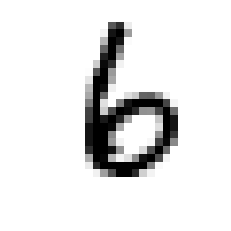

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision
from torchvision import transforms
from torchvision.datasets import MNIST

from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Chrome/89.0.4389.90')]
urllib.request.install_opener(opener)

#num_workers = 0
#batch_size = 20
#basepath = 'some/base/path'
#transform = transforms.ToTensor()

#def set_header_for(url, filename):
#    opener = urllib.request.URLopener()
#    opener.addheader('User-Agent', 'Chrome/89.0.4389.90')
#    opener.retrieve(
#    url, f'{basepath}/{filename}')

#set_header_for('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz', 'train-images-idx3-ubyte.gz')
#set_header_for('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz', 'train-labels-idx1-ubyte.gz')
#set_header_for('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz', 't10k-images-idx3-ubyte.gz')
#set_header_for('http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz', 't10k-labels-idx1-ubyte.gz')

#example
mnist_transform = transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize((0.1307,), (0.3081,)) ])


mnist_train_data = MNIST_local(root = os.getcwd() + "/drive/MyDrive", folder = "MNIST", train=True, transform=mnist_transform)
mnist_test_data  = MNIST_local(root = os.getcwd() + "/drive/MyDrive", folder = "MNIST", train=False, transform=mnist_transform)
#MNIST(os.getcwd() + "/drive/MyDrive", download=False, train=True, transform=mnist_transform)

image, label = mnist_train_data.__getitem__(2020)
plt.imshow(  image.view(28,28).numpy(), cmap = 'gray_r' )
plt.axis('off')
plt.show()

1. Now you must create a train-test-val split. 
  * First check [here](https://pytorch.org/docs/stable/torchvision/datasets.html#mnist) to know how to get a train-test split. Then use `random_split` to break your train set in a ratio [55000, 5000]. 
  * Create their respective loaders using `DataLoader`.
  * Create a function that receives a batch of images and can plot them in a organized manner. Check [here](https://matplotlib.org/3.3.1/tutorials/index.html).
  * Check the size of the datasets, as well as the shape of the images.
  * Check how balanced each dataset split is: You can use `torch.bincount` feature.

In [ ]:
#from https://slides.com/danielyukimura/deck-493038#/21/0/0
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

train, val = random_split(mnist_train_data, [55000, 5000])
print("Train Dataset Size:", len(mnist_train_data.data))
print("Training Size:", len(train.indices))
print("Validation Size:", len(val.indices))
print("Test Dataset Size:", len(mnist_test_data.data))

data_loader_train = DataLoader(train,           batch_size = data_batch_size, pin_memory = True)
data_loader_val   = DataLoader(val,             batch_size = data_batch_size, pin_memory = True)
data_loader_test  = DataLoader(mnist_test_data, batch_size = data_batch_size)

Train Dataset Size: 60000
Training Size: 55000
Validation Size: 5000
Test Dataset Size: 10000


Batch Images Size: torch.Size([32, 1, 28, 28])
Batch Labels Size: torch.Size([32])
torch.Size([1, 28, 28])


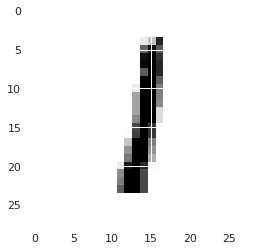

In [ ]:
dataiter = iter(data_loader_train) # create an iterator for each batch
images, labels = dataiter.next()
print("Batch Images Size:", images.shape)
print("Batch Labels Size:", labels.shape)

print(images[0].shape) # one image is 1 color by 28x28

#plt.imshow(images[0].reshape(28,28), cmap='gray_r')
#plt.imshow(images[0].view(28,28), cmap='gray_r')
plt.imshow(images[0][0], cmap='gray_r') # Get first image from batch and first color channel
#plt.imshow(images[0].permute(1,2))
#plt.imshow(torch.squeze(images[0]), cmap='gray_r')

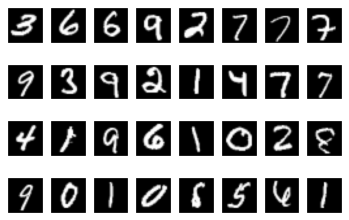

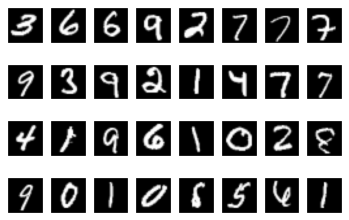

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(32):
  plt.subplot(4,8,i+1)
  plt.imshow(images[i][0], cmap='gray', interpolation='gaussian')
  plt.xticks([])
  plt.yticks([])
fig

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


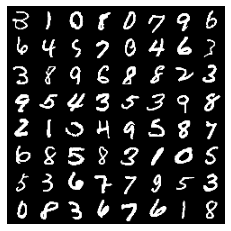

In [ ]:
# https://www.kaggle.com/vincentlefoulon/pytorch-mnist

def show_batch(batch):
    im = torchvision.utils.make_grid(batch, nrow=8)
    plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))
    plt.axis('off')
show_batch(images)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#https://matplotlib.org/3.3.1/tutorials/intermediate/constrainedlayout_guide.html#sphx-glr-tutorials-intermediate-constrainedlayout-guide-py
#https://matplotlib.org/3.3.1/tutorials/provisional/mosaic.html#sphx-glr-tutorials-provisional-mosaic-py


import matplotlib.image as image

Batch bincount: tensor([ 6,  4,  2, 10,  4,  8,  8,  6, 10,  6])
Train dataset bincount: tensor([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])
Test dataset bincount: tensor([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009])


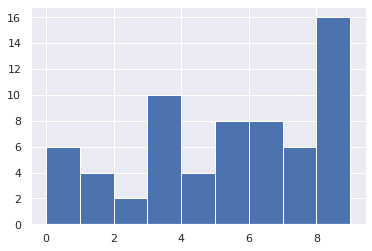

In [ ]:
print("Batch bincount:", torch.bincount(labels))
print("Train dataset bincount:", mnist_train_data.targets.bincount())
print("Test dataset bincount:", mnist_test_data.targets.bincount())

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

N_points = 100000
n_bins = 20

# Generate a normal distribution, center at x=0 and y=5
x = labels.numpy()

plt.hist(x, bins = [0,1,2,3,4,5,6,7,8,9])
plt.show()

2. Using `torch.nn` define a two layers feedforward neural network with a ReLU activation. The network must receive the image in its original shape, and reshape it in order to pass throught the linear layers.

3. Using the `CrossEntropyLoss` loss function you must set a SGD optimizer and train your network on the MNIST for at least 10 epochs. You should set a print statement or a progress bar to print your training loss.

4. Test your model in your test dataset. Remember to use `torch.no_grad`.

5. Change your learning rate and batch size one or two times to observe how the test performance varies.

**Usando um learning rate baixo, percebi que foi necessário utilizar um maior número de épocas para que fosse possível convergir para um valor de acurácia razoável, o que também foi percebido ao aumentar a quantidade de nós na camada intermediária do modelo. De fato, modificar a taxa de aprendizado do modelo faz com que sejam necessárias mais épocas para que o modelo chegue em um ponto ótimo global. No entanto, usar um learning rate alto pode fazer com que o modelo nunca chegue nesse ponto ótimo, fique sempre ao redor deste local. Algo semelhante pode ocorrer com métodos numéricos tipo Newton-raphson, usado para encontrar a solução de funções diferenciáveis. 
O tamanho do batch também afeta a performance do treinamento. Foi possível observar que ao usar batches menores, a função de perda foi diminuindo mais rápido, e obtive uma melhor acurácia (97.71 para 8, 97.64 para 16, 96.95 para 32). No entanto, foi necessário um tempo maior por iteração (11.68 para 8, 8.99 para 16, 7.16 para 32).**


In [ ]:
!pip install tqdm

In [ ]:
len(data_loader_train)

860

In [ ]:
import torch.nn as nn
import torch.nn.functional
import torch.optim
from tqdm.notebook import tqdm

device_cpu = torch.device("cpu")

print(dim_in, dim_hidden)
mnist_model = nn.Sequential(
    nn.Linear(dim_in, dim_hidden),
    nn.ReLU(),
    nn.Linear(dim_hidden, dim_out)
).to(device_cpu)

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(mnist_model.parameters(), lr = 0.01)

n_epochs = 10
losses = {"train loss": []}
loop = tqdm(range(n_epochs))

#############################################
# TRAINING LOOP
#############################################
for epoch in loop:
  loss_train = 0
  # can use enumerate to also get the index
  for batch_images, batch_labels in data_loader_train:
    batch_images = batch_images.to(device_cpu)
    batch_labels = batch_labels.to(device_cpu)
    
    batch_size = batch_images.shape[0]
    outputs = mnist_model(batch_images.view(batch_size, -1)) # 32, 28*28
    loss = loss_function(outputs, batch_labels)
    loss_train += loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # loss computation
  if True: # epoch % 10 == 0:
    lt = loss_train / len(data_loader_train)
    print("Epoch: %d, Loss %f" % (epoch, lt))
    losses["train loss"].append(lt)

784 128


Epoch: 0, Loss 0.465713
Epoch: 1, Loss 0.252952
Epoch: 2, Loss 0.200198
Epoch: 3, Loss 0.165885
Epoch: 4, Loss 0.142107
Epoch: 5, Loss 0.124397
Epoch: 6, Loss 0.110548
Epoch: 7, Loss 0.099373
Epoch: 8, Loss 0.090115
Epoch: 9, Loss 0.082323



In [ ]:
#############################################
# TEST LOOP
#############################################
correct = 0
total = 0

with torch.no_grad():
  for batch_images, batch_labels in data_loader_test:
    batch_images = batch_images.to(device_cpu)
    batch_labels = batch_labels.to(device_cpu)
    
    batch_size = batch_images.shape[0]
    outputs = mnist_model(batch_images.view(batch_size, -1))
    _, predicted = torch.max(outputs, 1)
    total += labels.shape[0]
    correct += int((predicted == batch_labels).sum())

print("Accuracy: %f" % (100.0*(correct / total)))

Accuracy: 96.954872


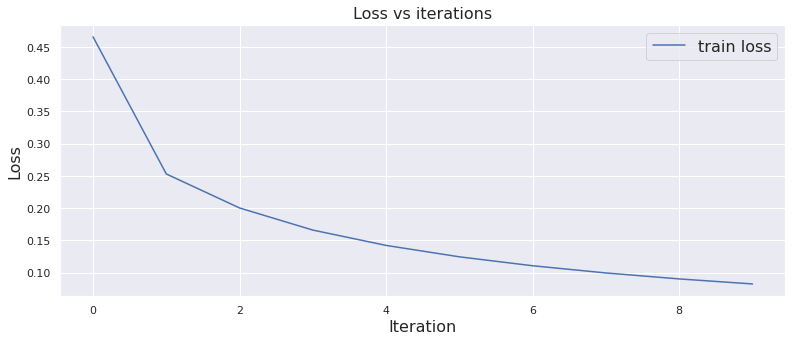

In [ ]:
#############################################
# LOSS PER EPOCH
#############################################
def plot_losses(losses):
  fig = plt.figure(figsize=(13, 5))
  ax = fig.gca()
  for loss_name, loss_values in losses.items():  
    ax.plot(loss_values, label=loss_name)
  ax.legend(fontsize="16")
  ax.set_xlabel("Iteration", fontsize="16")
  ax.set_ylabel("Loss", fontsize="16")
  ax.set_title("Loss vs iterations", fontsize="16");
plot_losses(losses)

In [ ]:
cuda = torch.cuda.is_available()
device_gpu = torch.device("cuda:0" if cuda else "cpu")
print(cuda, device_gpu)

True cuda:0


6. Next, change the runtime of colab for running with the GPU and modify your code to run in the gpu.

7. Add a validation step in your training loop, saving your validation loss throughout the training. After the training plot the curve of the progress of this validation loss.

8. Add an accuracy measure in the validation loop. You might have to modify your model in order to get the logit values, then you can use `torch.argmax` to obtain the labels predicted, which you must them compare with the true labels. Plot the evolution of the accuracy.


**Ao passar o modelo para GPU, percebi que cada iteração do treinamento acabou demorando mais do que em CPU (7.16 para 9.68 segundos), partindo de uma camada intermediária de 128 nós. Então, tentei fazer um teste extrapolando o número de nós da camada intermediária para 10000. Nesse caso, pude perceber que o modelo em CPU demorou cerca de 50 s por iteração, enquanto o modelo em GPU se manteve em certa de 9 s. Nesse caso, creio que uma rede simples acaba não tendo um impacto de performance tão grande, pois não consegue explorar a paralelização em GPU de maneira efetiva. Além disso, passar o modelo para a GPU pode gerar um tempo adicional por questões de alocação e transferência de memória.
Por fim, optei por gerar os resultados utilizando uma rede neural com 128 nós na camada intermediária, treinada com batches de 32 imagens, usando uma taxa de aprendizado de 0.01. Nas imagens abaixo, podemos ver que a acurácia da validação foi aumentando de acordo com cada época, assim como a função de perda também foi diminuindo. Nos dados de teste, foi alcançada uma acurácia de 97.07%.**


In [ ]:
import torch.optim as optim
from tqdm.notebook import tqdm

print(dim_in, dim_hidden)
mnist_model = nn.Sequential(
    nn.Linear(dim_in, dim_hidden),
    nn.ReLU(),
    nn.Linear(dim_hidden, dim_out)
).to(device_gpu)

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(mnist_model.parameters(), lr = 0.01)

n_epochs = 10
losses = {"train loss": []}
validations = {"accuracy" : []}
loop = tqdm(range(n_epochs))

#############################################
# TRAINING LOOP
#############################################
for epoch in loop:
  loss_train = 0
  for batch_images, batch_labels in data_loader_train:
    batch_images = batch_images.to(device_gpu)
    batch_labels = batch_labels.to(device_gpu)

    batch_size = batch_images.shape[0]
    outputs = mnist_model(batch_images.view(batch_size, -1)) 
    loss = loss_function(outputs, batch_labels)
    loss_train += loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #torch.cuda.synchronize()
  #############################################
  # VALIDATION LOOP
  #############################################
  if True: #epoch % 10 == 0:
    correct = 0
    total = 0
    val_loss = []
    with torch.no_grad():
      for batch_images, batch_labels in data_loader_val:
        batch_images = batch_images.to(device_gpu)
        batch_labels = batch_labels.to(device_gpu)
        
        batch_size = batch_images.shape[0]
        outputs = mnist_model(batch_images.view(batch_size, -1))
        
        #ERROOOOOOOOOOU
        #loss_val += loss(outputs,labels)
        
        _, predicted = torch.max(outputs, 1)
        total += labels.shape[0]
        correct += int((predicted == batch_labels).sum())

    lt = loss_train / len(data_loader_train)
    print("Validation Accuracy: %f" % (100.0*(correct / total)))
    print("Epoch: %d, Loss %f, len %d" % (epoch, lt, len(data_loader_train)))
    validations["accuracy"].append((correct / total))
    losses["train loss"].append(lt)
    #loss_validation = loss_val / len(data_loader_val)

  #with torch.no_grad():
  
     

784 128


Validation Accuracy: 91.102707
Epoch: 0, Loss 0.460954, len 1719
Validation Accuracy: 92.655255
Epoch: 1, Loss 0.247021, len 1719
Validation Accuracy: 93.869427
Epoch: 2, Loss 0.196431, len 1719
Validation Accuracy: 94.625796
Epoch: 3, Loss 0.164499, len 1719
Validation Accuracy: 95.023885
Epoch: 4, Loss 0.141697, len 1719
Validation Accuracy: 95.262739
Epoch: 5, Loss 0.124278, len 1719
Validation Accuracy: 95.601115
Epoch: 6, Loss 0.110526, len 1719
Validation Accuracy: 95.740446
Epoch: 7, Loss 0.099326, len 1719
Validation Accuracy: 95.939490
Epoch: 8, Loss 0.090033, len 1719
Validation Accuracy: 96.098726
Epoch: 9, Loss 0.082185, len 1719



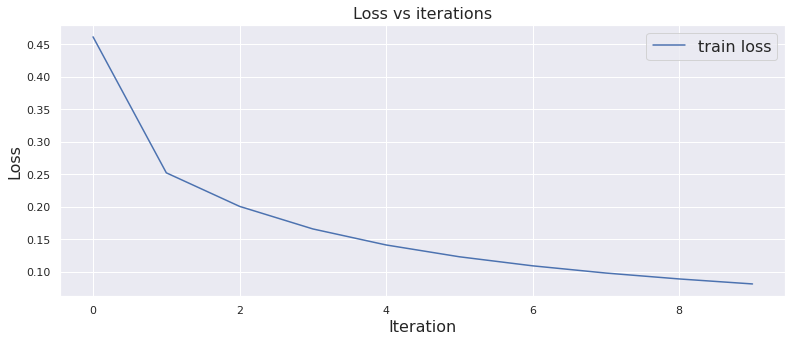

In [ ]:
#############################################
# LOSS and ACCURACY PER EPOCH
#############################################
def plot_losses(losses):
  fig = plt.figure(figsize=(13, 5))
  ax = fig.gca()
  for loss_name, loss_values in losses.items():  
    ax.plot(loss_values, label=loss_name)
  ax.legend(fontsize="16")
  ax.set_xlabel("Iteration", fontsize="16")
  ax.set_ylabel("Loss", fontsize="16")
  ax.set_title("Loss vs iterations", fontsize="16");
plot_losses(losses)

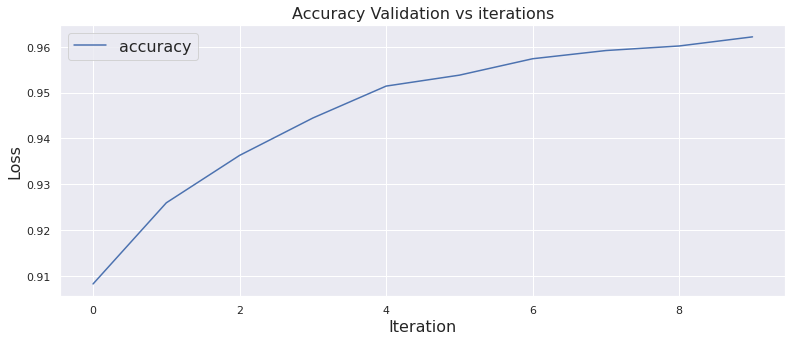

In [ ]:
def plot_validations(validations):
  fig = plt.figure(figsize=(13, 5))
  ax = fig.gca()
  for val_name, val_values in validations.items():
    ax.plot(val_values, label=val_name)
  ax.legend(fontsize="16")
  ax.set_xlabel("Iteration", fontsize="16")
  ax.set_ylabel("Loss", fontsize="16")
  ax.set_title("Accuracy Validation vs iterations", fontsize="16");
plot_validations(validations)

In [ ]:
#############################################
# TEST LOOP
#############################################
correct = 0
total = 0

predicted_outputs = np.array([], dtype=int)
truth_outputs = np.array([], dtype=int)

with torch.no_grad():
  for batch_images, batch_labels in data_loader_test:
    batch_images = batch_images.to(device_gpu)
    batch_labels = batch_labels.to(device_gpu)
    
    batch_size = batch_images.shape[0]
    outputs = mnist_model(batch_images.view(batch_size, -1))
    _, predicted = torch.max(outputs, 1)
    predicted_outputs = np.append(predicted_outputs, predicted.to(device_cpu).numpy())
    truth_outputs = np.append(truth_outputs, batch_labels.to(device_cpu).numpy())
    #print(predicted.to(device_cpu).numpy())

    total += labels.shape[0]
    correct += int((predicted == batch_labels).sum())

print("Accuracy: %f" % (100.0*(correct / total)))

Accuracy: 97.074681


9. **[EXTRA]** Plot the confusion matrix for your result model. I suggest using [Seaborn](https://seaborn.pydata.org/). And evaluate the performance of your model.

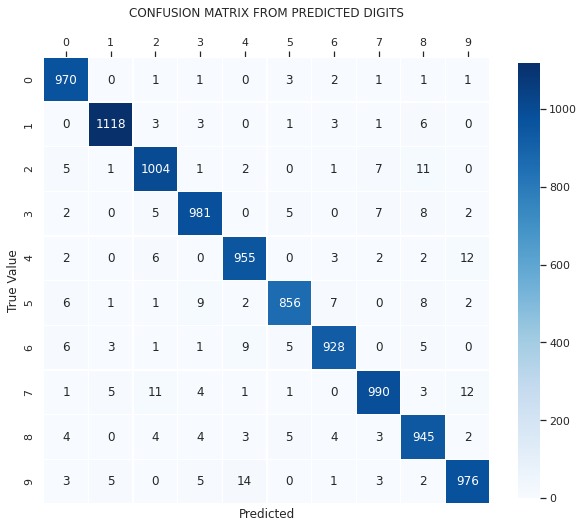

In [ ]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()

confusion_data = np.zeros((10,10), dtype=float)

for i in range(truth_outputs.shape[0]):
  confusion_data[truth_outputs[i], predicted_outputs[i]] += 1

#for i in range(10):
#  for j in range(10):
#    confusion_data[i, j] /= 10000

# figure
fig, ax = plt.subplots(figsize=(10, 10))
# plot heatmap
sns.heatmap(confusion_data, annot=True, cmap="Blues",square=True, fmt=".0f",
           linewidth=0.3, cbar_kws={"shrink": .8})
# xticks
ax.xaxis.tick_top()
xticks_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plt.xticks(np.arange(10) + .5, labels=xticks_labels)
# axis labels
plt.xlabel('Predicted')
plt.ylabel('True Value')
# title
title = 'Confusion Matrix from Predicted digits\n'.upper()
plt.title(title)
plt.show()